---
title: ReLU Activation Functions
jupyter: "ReLU"
description: "Non Linearity using ReLU activation function"
author: "Shataxi Dubey"
date: "2025-06-26"
categories: [ReLU, Linearity]
format:
    html:
        toc: true
---

In [ ]:
import torch
import torch.nn as nn

In [ ]:
bias = True
linear = nn.Linear(2, 4, bias)
print(f'Weights of the linear layer {linear.weight}')
print(f'Bias in the linear layer {linear.bias}')
print(f'dtype of weights {linear.weight.dtype}')
input = torch.arange(start=1, end = 3)
input = input.reshape(1,2)
input = input.to(torch.float32)
print(f'Input {input}')
original_output = linear(input)
print(f'Output {original_output}')
print(f'Output shape {original_output.shape}')

Weights of the linear layer Parameter containing:
tensor([[ 0.5120, -0.4466],
        [ 0.2942, -0.1407],
        [ 0.2281, -0.0761],
        [-0.5581,  0.6117]], requires_grad=True)
Bias in the linear layer Parameter containing:
tensor([-0.3678, -0.3932,  0.4398,  0.2615], requires_grad=True)
dtype of weights torch.float32
Input tensor([[1., 2.]])
Output tensor([[-0.7489, -0.3803,  0.5158,  0.9267]], grad_fn=<AddmmBackward0>)
Output shape torch.Size([1, 4])


In [ ]:
linear(input)

tensor([[-0.7489, -0.3803,  0.5158,  0.9267]], grad_fn=<AddmmBackward0>)

In [ ]:
if bias:
  output = linear.weight[0]@input[0] + linear.bias[0]
else:
  output = linear.weight[0]@input[0]
print(output)

tensor(-0.7489, grad_fn=<AddBackward0>)


linear($2*input$) = $2*linear(input)$ when bias is False.

linear($2*input$) != $2*linear(input)$ when bias is True. The transformation is affine in this case.

In [ ]:
linear(2*input)

tensor([[-1.1300, -0.3675,  0.5917,  1.5919]], grad_fn=<AddmmBackward0>)

In [ ]:
2*linear(input)

tensor([[-1.4978, -0.7607,  1.0316,  1.8534]], grad_fn=<MulBackward0>)

In [ ]:
if bias:
  output = linear.weight[0]@(2*input[0]) + linear.bias[0]
else:
  output = linear.weight[0]@(2*input[0])
print(output)

tensor(-1.1300, grad_fn=<AddBackward0>)


In [ ]:
linear(input + 5)

tensor([[-0.4215,  0.3874,  1.2760,  1.1945]], grad_fn=<AddmmBackward0>)

In [ ]:
if bias:
  output = linear(input) + linear(torch.tensor([5.0,5.0])) - linear.bias[0]
else:
  output = linear(input) + linear(torch.tensor([5.0,5.0]))
print(output)

tensor([[-0.4215,  0.3620,  2.0836,  1.8237]], grad_fn=<SubBackward0>)


In [ ]:
if bias:
  output = linear.weight[0]@(input[0] + 5)+ linear.bias[0]
else:
  output = linear.weight[0]@(input[0] + 5)
print(output)

tensor(-0.4215, grad_fn=<AddBackward0>)


Lets see the non linearity added by ReLU activation function

In [ ]:
output = original_output.squeeze(dim = 0)
output

tensor([-0.7489, -0.3803,  0.5158,  0.9267], grad_fn=<SqueezeBackward1>)

In [ ]:
relu = nn.ReLU()
relu(output)

tensor([0.0000, 0.0000, 0.5158, 0.9267], grad_fn=<ReluBackward0>)

ReLU is not a linear function by the definition of Linear functions

a) $ReLU(2*a) = 2*ReLU(a)$

In [ ]:
relu(-2*output)

tensor([1.4978, 0.7607, 0.0000, 0.0000], grad_fn=<ReluBackward0>)

In [ ]:
-2*relu(output)

tensor([-0.0000, -0.0000, -1.0316, -1.8534], grad_fn=<MulBackward0>)

b) $ReLU(a + b)$  $!=$ $ReLU(a) + ReLU(b)$

In [ ]:
relu(output + output.min())

tensor([0.0000, 0.0000, 0.0000, 0.1778], grad_fn=<ReluBackward0>)

In [ ]:
relu(output) + relu(output.min())

tensor([0.0000, 0.0000, 0.5158, 0.9267], grad_fn=<AddBackward0>)

Lets see what happens through multiple linear layers

In [ ]:
from tqdm import tqdm
train_data = torch.tensor(torch.arange(1,100))
train_data = train_data.to(torch.float32)
train_data = train_data.reshape(99,1)
train_out = train_data**2
print(train_data.size())
print(train_out.size())
linear = nn.Linear(1,4)
hidden_linear = nn.Linear(4,4)
out_linear = nn.Linear(4,1)
model = nn.Sequential(
    nn.Linear(1,8),
    nn.Linear(8,8),
    nn.Linear(8,1),
)

epochs = 100000
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in tqdm(range(epochs)):
  optimizer.zero_grad()
  pred = model(train_data)
  loss = loss_fn(pred, train_out)
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch} loss {loss}')


Without ReLU activation function, there is no non-linearity in the network due to which the squared function is not followed by the neural network.

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100])


/tmp/ipython-input-87-1621197856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(torch.arange(1,101))


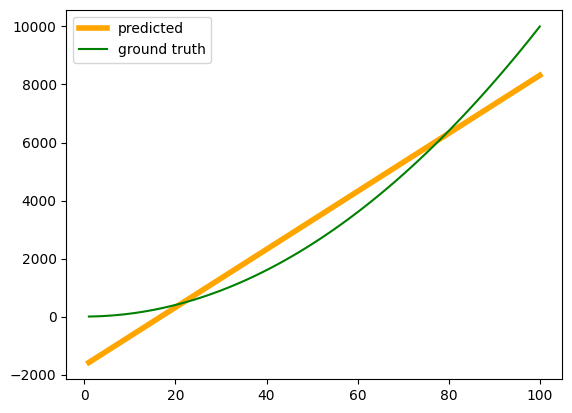

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
input = torch.tensor(torch.arange(1,101))
print(input)
input = input.to(torch.float32)
input = input.reshape(100,1)
out = model(input)
ax.plot(input, out.detach(), color = 'orange', linewidth = 4, label = 'predicted')
ax.plot(input, input**2, color = 'green', label = 'ground truth')
plt.legend()

In [ ]:
from tqdm import tqdm
torch.random.manual_seed(42)
input = torch.tensor(torch.arange(1,100))
input = input.to(torch.float32)
train_data = input.reshape(99,1)
train_out = train_data**2

relu = nn.ReLU()
model = nn.Sequential(
    nn.Linear(1,8),
    relu,
    nn.Linear(8,8),
    relu,
    nn.Linear(8,1),

)

epochs = 100000
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
for epoch in range(epochs):
  optimizer.zero_grad()
  pred = model(train_data)
  loss = loss_fn(pred, train_out)
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch} loss {loss}')


tensor([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199])


/tmp/ipython-input-89-1213791851.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(torch.arange(100,200))


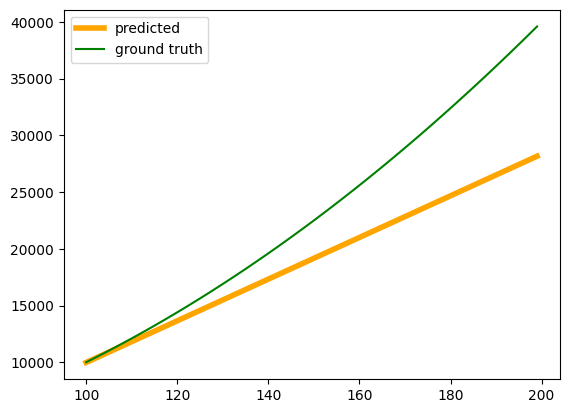

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
input = torch.tensor(torch.arange(100,200))
print(input)
input = input.to(torch.float32)
input = input.reshape(100,1)
out = model(input)
ax.plot(input, out.detach(), color = 'orange', linewidth = 4, label = 'predicted')
ax.plot(input, input**2, color = 'green', label = 'ground truth')
plt.legend()

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100])


/tmp/ipython-input-93-179746123.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(torch.arange(1,101))


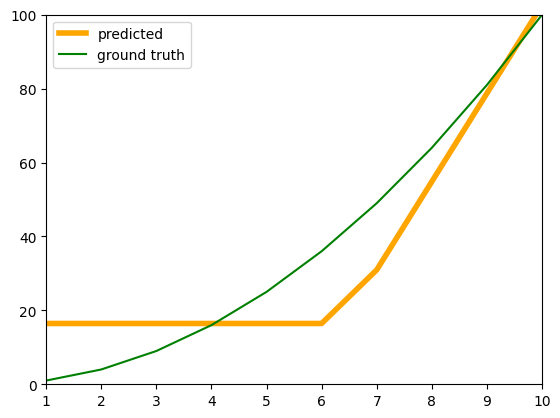

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
input = torch.tensor(torch.arange(1,101))
print(input)
input = input.to(torch.float32)
input = input.reshape(100,1)
out = model(input)
ax.plot(input, out.detach(), color = 'orange', linewidth = 4, label = 'predicted')
ax.plot(input, input**2, color = 'green', label = 'ground truth')
ax.set_xlim(1,10)
ax.set_ylim(0,100)
plt.legend()

This shows that using a series of ReLU activation functions introduces non-linearity into the neural network. A neural network without any activation functions produces only linear outputs, even on the training data. However, when ReLU is added, the network is able to learn the square function on the training data, and the learned function also approximates the actual function more closely on the test data.